#Build SegNet Model

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Conv2DTranspose, UpSampling2D, Input, Dense
from tensorflow.keras.models import Model

def segnet(input_shape):

    img_input = Input(shape= input_shape)
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    pred = Activation('sigmoid')(x)

    model = Model(inputs=img_input, outputs=pred)
    return model
model = segnet((256, 256, 3))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 256, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_26 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 conv2 (Conv2D)              (None, 256, 256, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_27 (Activation)  (None, 256, 256, 64)      0   

# Metrics

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope

with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = load_model("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/Metrics_model_5000_segnet.h5")
# model.summary()

#Training data with SegNet

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

""" Global parameters """
H = 256
W = 256

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))[:5000]
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))[:5000]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    x = np.expand_dims(x, axis=-1)## (h, w, 1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset

if __name__ == "__main__":

    """ Hyperparameters """
    batch_size = 32
    lr = 1e-2
    num_epochs = 100
    model_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_model_5000_segnet.h5"
    csv_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_log_5000_segnet.csv"

    """ Dataset """
    dataset_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/new_data"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test : {len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

    """ Model """
    model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    """ Traning """
    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-9, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]
    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )

Train: 3000 - 3000
Valid: 1000 - 1000
Test : 1000 - 1000
Epoch 1/100
94/94 [==============================] - ETA: 0s - loss: 0.1774 - dice_coef: 0.8225 
Epoch 1: val_loss improved from inf to 0.46046, saving model to /content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_model_5000_segnet.h5
94/94 [==============================] - 2518s 26s/step - loss: 0.1774 - dice_coef: 0.8225 - val_loss: 0.4605 - val_dice_coef: 0.5376 - lr: 0.0100
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 0.1806 - dice_coef: 0.8194
Epoch 2: val_loss improved from 0.46046 to 0.40679, saving model to /content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_model_5000_segnet.h5
94/94 [==============================] - 141s 1s/step - loss: 0.1806 - dice_coef: 0.8194 - val_loss: 0.4068 - val_dice_coef: 0.5957 - lr: 0.0100
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.1711 - dice_coef: 0.8290
Epoch 3:

#Test Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

""" Global parameters """
H = 256
W = 256

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))[:5000]
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))[:5000]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)

""" -------------Main--------------- """

""" Directory for storing files """
create_dir("results")

""" Load the model """
with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = load_model('/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_model_5000_segnet.h5')

""" Dataset """
dataset_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/new_data"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

""" Prediction and Evaluation """
SCORE = []
for x, y in tqdm(zip(test_x, test_y), total=len(test_y)):
    """ Extracting the name """
    name = x.split("/")[-1]

    """ Reading the image """
    image = cv2.imread(x, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (W, H))
    x = image/255.0
    x = np.expand_dims(x, axis=0)

    """ Reading the mask """
    mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (W, H))

    """ Prediction """
    y_pred = model.predict(x, verbose=0)[0]
    y_pred = np.squeeze(y_pred, axis=-1)
    y_pred = y_pred >= 0.5
    y_pred = y_pred.astype(np.int32)

    """ Saving the prediction """
    save_image_path = os.path.join("results", name)
    save_results(image, mask, y_pred, save_image_path)

    """ Flatten the array """
    mask = mask/255.0
    mask = (mask > 0.5).astype(np.int32).flatten()
    y_pred = y_pred.flatten()

    """ Calculating the metrics values """
    f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
    jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
    recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    SCORE.append([name, f1_value, jac_value, recall_value, precision_value])

""" Metrics values """
score = [s[1:]for s in SCORE]
score = np.mean(score, axis=0)

print("\n")
print(f"F1: {score[0]:0.5f}")
print(f"Jaccard: {score[1]:0.5f}")
print(f"Recall: {score[2]:0.5f}")
print(f"Precision: {score[3]:0.5f}")

df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
df.to_csv("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_score_5000_SegNet.csv")

100%|██████████| 1000/1000 [24:34<00:00,  1.47s/it]




F1: 0.81025
Jaccard: 0.71057
Recall: 0.83963
Precision: 0.81546


#Chart for Train

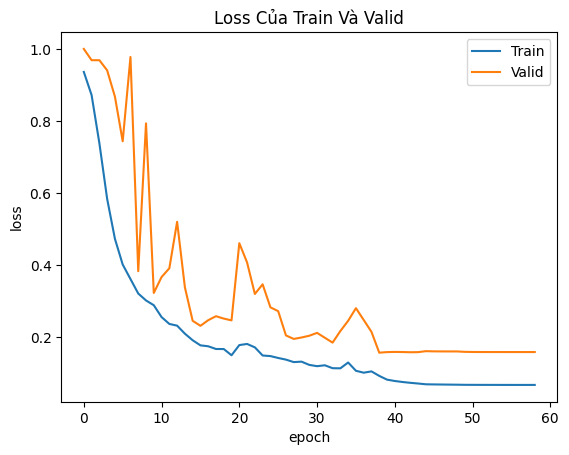

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Metrics_log_5000_segnet.csv")

plt.plot(range(len(df['loss'].values)), df['loss'].values, label = 'Train')
plt.plot(range(len(df['val_loss'].values)), df['val_loss'].values, label = 'Valid')
plt.title('Loss Của Train Và Valid')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

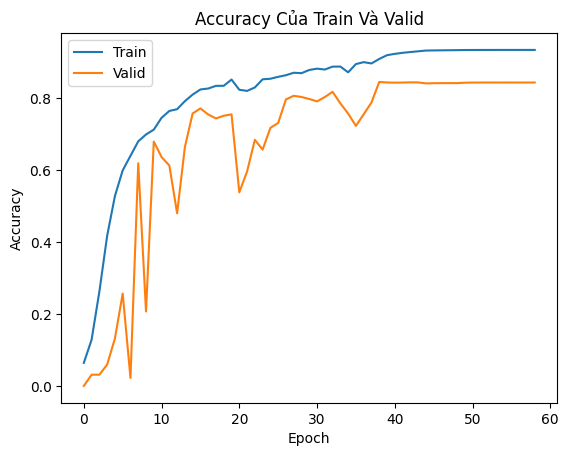

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Metrics_log_5000_segnet.csv")

plt.plot(range(len(df['dice_coef'].values)), df['dice_coef'].values, label = 'Train')
plt.plot(range(len(df['val_dice_coef'].values)), df['val_dice_coef'].values, label = 'Valid')
plt.title('Accuracy Của Train Và Valid')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Prediction for one image

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from tensorflow.keras.metrics import IoU

""" Load model """
with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/SegNet/files/2_Metrics_model_5000_segnet.h5")

""" parameter """
W = 256
H = 256

""" Read image and mask """
path_image = "/content/1739_0.png"
path_mask = "/content/mask.png"
""" Reading the image """
image = cv2.imread(path_image, cv2.IMREAD_COLOR) # [H, w, 3]
image = cv2.resize(image, (W, H))       # [H, w, 3]
x = image/255.0                         # [H, w, 3]
x = np.expand_dims(x, axis=0)           # [1, H, w, 3]

""" Reading the mask """
mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (W, H))

""" Prediction """
y_pred = model.predict(x, verbose=0)[0]
y_pred = np.squeeze(y_pred, axis=-1)
y_pred = y_pred >= 0.5
y_pred = y_pred.astype(np.int32)

""" Flatten the array """
mask = mask/255.0
mask = (mask > 0.5).astype(np.int32).flatten()
y_pred = y_pred.flatten()

""" Calculating the metrics values """
f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
m = IoU(num_classes=2, target_class_ids=[1])
m.update_state(mask, y_pred)
iou = m.result().numpy()

print(f"f1_value:{f1_value:0.5f}\n jac_value: {jac_value:0.5f} \n recall_value: {recall_value:0.5f}\n precision_value: {precision_value:0.5f}\n iou: {iou:0.5f} ")


f1_value:0.96680
 jac_value: 0.93573 
 recall_value: 0.97196
 precision_value: 0.96169
 iou: 0.93573 


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(mask, y_pred)
print(matrix)

[[64758    29]
 [   21   728]]


<Axes: >

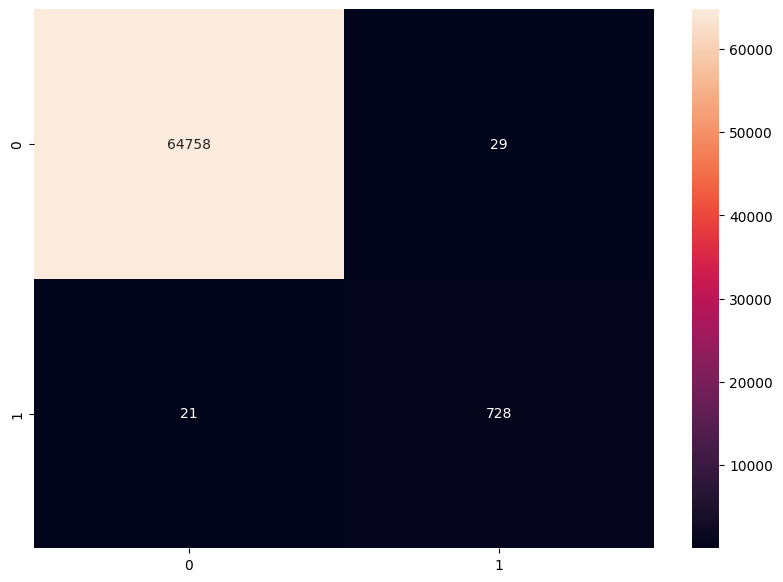

In [ ]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(matrix, index = [0,1],
                  columns = [0,1])
pyplot.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True, fmt="g" )
